In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = np.load("data.npy")

Nous allons utiliser la méthode Elbow afin d'obtenir le nombre potentiel de cluster :

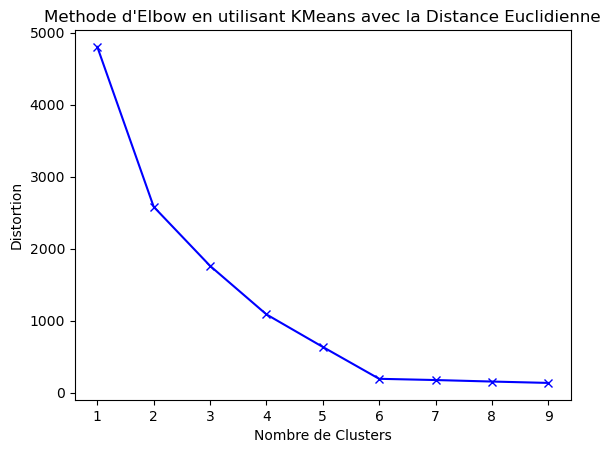

Le nombre optimal de cluster avec la methode d'Elbow est: 6


In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Distortion')
plt.title("Methode d'Elbow en utilisant KMeans avec la Distance Euclidienne")
plt.show()

slope = np.diff(distortions)

elbow_point = np.argmax(slope) + 1
print("Le nombre optimal de cluster avec la methode d'Elbow est:", elbow_point)


Afin de verifier ce résultat nous pouvons utiliser la méthode de Silhouette score :

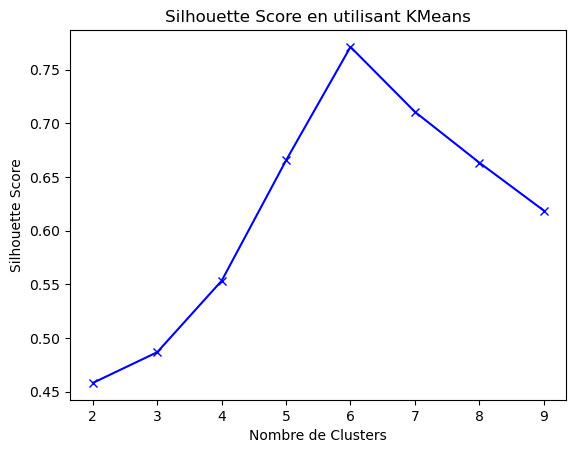

Le nombre optimal de clusters determiné par la methode de Silhouette Score est: 6


In [19]:
K = range(2, 10)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score en utilisant KMeans')
plt.show()

optimal_num_clusters = K[np.argmax(silhouette_scores)]
print('Le nombre optimal de clusters determiné par la methode de Silhouette Score est:', optimal_num_clusters)
